In [13]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0)

In [14]:
values = DataFrame(series.values)

In [15]:
dataframe = concat([values.shift(1), values], axis = 1)

In [16]:
dataframe.columns = ['t-1', 't+1']

In [17]:
dataframe

,t-1,t+1
0,NaN,20.7
1,20.7,17.9
2,17.9,18.8
3,18.8,14.6
4,14.6,15.8
...,...,...
3645,14.6,14.0
3646,14.0,13.6
3647,13.6,13.5
3648,13.5,15.7


In [18]:
result = dataframe.corr()

In [19]:
print(result)

         t-1      t+1
t-1  1.00000  0.77487
t+1  0.77487  1.00000


In [20]:
from pandas.plotting import autocorrelation_plot

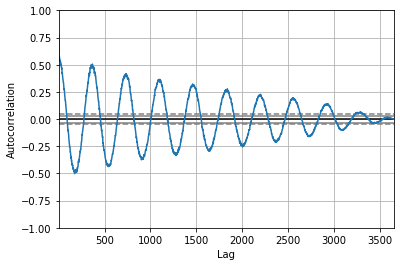

In [21]:
autocorrelation_plot(series)

In [22]:
from statsmodels.graphics.tsaplots import plot_acf

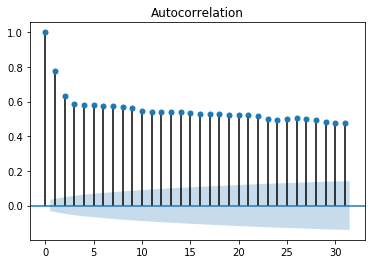

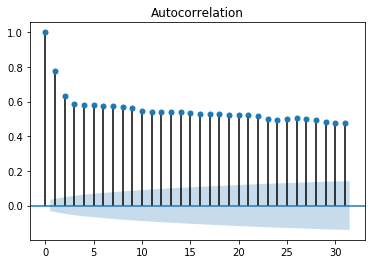

In [23]:
plot_acf(series, lags = 31)

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
X = dataframe.values

In [26]:
train, test = X[1:len(X)-7], X[len(X)-7:]

In [27]:
train, test

(array([[20.7, 17.9],
        [17.9, 18.8],
        [18.8, 14.6],
        ...,
        [13.1, 13.2],
        [13.2, 13.9],
        [13.9, 10. ]]), array([[10. , 12.9],
        [12.9, 14.6],
        [14.6, 14. ],
        [14. , 13.6],
        [13.6, 13.5],
        [13.5, 15.7],
        [15.7, 13. ]]))

In [28]:
train_X, train_y = train[:,0], train[:, 1]

In [29]:
test_X, test_y = test[:, 0], test[:, 1]

In [30]:
def model_persistence(x):
    return x

#walk-forward validation

In [31]:
predictions = list()

In [32]:
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)

In [33]:
test_score = mean_squared_error(test_y, predictions)

In [34]:
print('Test MSE: %.3f' % test_score)

Test MSE: 3.423


#plot predictions vs expected

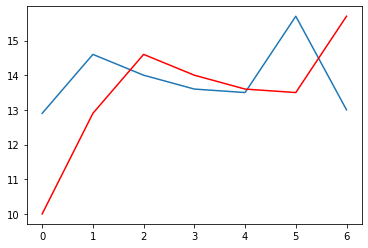

In [36]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

In [38]:
from statsmodels.tsa.ar_model import AR

In [39]:
model = AR(train)

ValueError: Only the univariate case is implemented

In [40]:
train

array([[20.7, 17.9],
       [17.9, 18.8],
       [18.8, 14.6],
       ...,
       [13.1, 13.2],
       [13.2, 13.9],
       [13.9, 10. ]])

In [41]:
series.values

array([[20.7],
       [17.9],
       [18.8],
       ...,
       [13.5],
       [15.7],
       [13. ]])

In [42]:
train = series.values[1:len(series.values) -7]

In [43]:
train

array([[17.9],
       [18.8],
       [14.6],
       ...,
       [13.2],
       [13.9],
       [10. ]])

In [44]:
test = series.values[len(series.values) -7 : ] 

In [45]:
test

array([[12.9],
       [14.6],
       [14. ],
       [13.6],
       [13.5],
       [15.7],
       [13. ]])

In [46]:
model = AR(train)

In [47]:
model_fit = model.fit()

In [48]:
print('Lag: %s' % model_fit.k_ar)

Lag: 29


In [49]:
print('Coefficients: %s' % model_fit.params)

Coefficients: [ 5.57543506e-01  5.88595221e-01 -9.08257090e-02  4.82615092e-02
  4.00650265e-02  3.93020055e-02  2.59463738e-02  4.46675960e-02
  1.27681498e-02  3.74362239e-02 -8.11700276e-04  4.79081949e-03
  1.84731397e-02  2.68908418e-02  5.75906178e-04  2.48096415e-02
  7.40316579e-03  9.91622149e-03  3.41599123e-02 -9.11961877e-03
  2.42127561e-02  1.87870751e-02  1.21841870e-02 -1.85534575e-02
 -1.77162867e-03  1.67319894e-02  1.97615668e-02  9.83245087e-03
  6.22710723e-03 -1.37732255e-03]


#make predictions

In [50]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

In [51]:
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))

predicted=11.871275, expected=12.900000
predicted=13.053794, expected=14.600000
predicted=13.532591, expected=14.000000
predicted=13.243126, expected=13.600000
predicted=13.091438, expected=13.500000
predicted=13.146989, expected=15.700000
predicted=13.176153, expected=13.000000


In [52]:
error = mean_squared_error(test, predictions)

In [53]:
print('Test MSE: %.3f' % error)

Test MSE: 1.502


# plot results

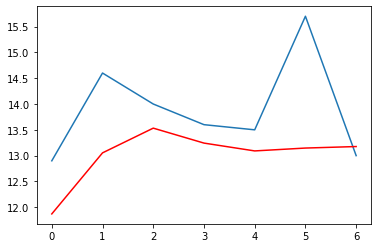

In [55]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

predicted=11.871275, expected=12.900000
predicted=13.659297, expected=14.600000
predicted=14.349246, expected=14.000000
predicted=13.427454, expected=13.600000
predicted=13.374877, expected=13.500000
predicted=13.479991, expected=15.700000
predicted=14.765146, expected=13.000000
Test MSE: 1.451


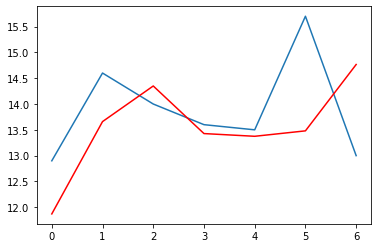

In [56]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0)
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()